# Basic text analysis.

Book in place, book class ready, let's start the exploratory analysis. 


But first, we have to import the functions of book.py without rewriting code.


To import a python file in another file or notebook, use the keyword "import <file.py>".

## goal:

 1. Import the book.py file to access the Book class and its methods. 
 
 
 2. Create book objects out of all files in books/.
     - We introduce a python library called *os*, it allows us to scan directories and access files in a quick way.
     
     
 3. Import a library for plotting, the most popular and used (albeit a bit verbose) is called *matplotlib*
     - We need only its object which allows us to make plots, called *pyplot*. 
     
     
 4. Do some comparative plots of the books:
     1. create a bar plot with the year in x and average word length in y.
     2. create a bar plot with the language in x and the average word length in y.
     3. change the plots above by putting the avg sentence or paragraph length in y.
     
     
 5. Plot more interesting facts about these books:
     1. Which authors talk about 'love'? (in English or other languages)
     2. How is gender described?
     

In [1]:
# import the book file
from book import Book
# let's import also the os library
import os

**It is customary but not required to place all import statements at the beginning of a script (or notebook).**
A module is a file containing Python definitions and statements. 

The file name is the module name with the suffix .py appended.


We have the following ways to import a module:
- **import module**: it will import everything. 
- **from module import func1, func2**: it will import just func1 and func2, same as *import module.func1, module func2*
- **from module import ***: it will import everything, same as *import module*
- **import module as mod**: replace the name *module* with an alias, *mod*
- **from module import func1 as f1**: it will import func1, but its alias is f1


mode on modules here: https://docs.python.org/3/tutorial/modules.html

In [2]:
# I won't cover how the os library works, we are only interested in a function that scans a folder and select all files.
# step 1: create a list of Book objects

list_books = []
with os.scandir('books') as files:
    for file in files:
        print(f'\n\nI am now working with file: {file}')
        book = Book(file)
        list_books.append(book)



I am now working with file: <DirEntry '1080-0.txt'>


I am now working with file: <DirEntry '11-0.txt'>


I am now working with file: <DirEntry '1342-0.txt'>


I am now working with file: <DirEntry '1661-0.txt'>


I am now working with file: <DirEntry '1952-0.txt'>


I am now working with file: <DirEntry '25344-0.txt'>


I am now working with file: <DirEntry '2701-0.txt'>


I am now working with file: <DirEntry '38082-0.txt'>


I am now working with file: <DirEntry '38637-0.txt'>


I am now working with file: <DirEntry '42237-0.txt'>


I am now working with file: <DirEntry '46-0.txt'>


I am now working with file: <DirEntry '48361-0.txt'>


I am now working with file: <DirEntry '62400-0.txt'>


I am now working with file: <DirEntry '84-0.txt'>


I am now working with file: <DirEntry 'pg12117.txt'>


I am now working with file: <DirEntry 'pg12167.txt'>


I am now working with file: <DirEntry 'pg12987.txt'>


I am now working with file: <DirEntry 'pg17853.txt'>


I am now working with 

In [10]:
# good, now let's browse the languages
for book in list_books:
    print(book.language)

English
English
English
English
English
English
English
Italian
Italian
Italian
English
Italian
Italian
English
Danish
Danish
Danish
Italian
Italian
Italian
Italian
Italian
Italian
Danish
Italian
Danish
Danish
Danish
Danish
English
Danish


In [25]:
# let's create a function to get all books in a language:
def get_books_in_language(language):
    """Return all the books from the list that are in the given language"""
    books = []
    for book in list_books:
        if book.language == language:
            books.append(book)
    return books

In [26]:
english_books = get_books_in_language('English')
for b in english_books:
    print(f'{b.title} - {b.language}')

A Modest Proposal - English
Alice’s Adventures in Wonderland - English
Pride and Prejudice - English
The Adventures of Sherlock Holmes - English
 - English
The Scarlet Letter - English
Moby Dick; or The Whale - English
A Christmas Carol - English
Frankenstein - English
Metamorphosis - English


In [27]:
danish_books = get_books_in_language('Danish')
for b in danish_books:
    print(f'{b.title} - {b.language}')

Excentriske noveller - Danish
Enkens søn - Danish
Det graa hus - Danish
Etienne Gerards Bedrifter - Danish
Julies Dagbog - Danish
Skovstrup-Folk - Danish
Maria - Danish
Guds Fred - Danish
Indtryk og Minder fra Dybbøl - Danish


In [28]:
# define a function that returns all the books written by a given author
def get_books_by_author(author):
    """Return all the books from the list that are written by the given author"""
    books = []
    for b in list_books:
        if b.author == author:
            books.append(b)
    return books

In [29]:
charles_dickens_books = get_books_by_author('Charles Dickens')
print()
print(f'There are {len(charles_dickens_books)} books written by Charles Dickens')
for book in charles_dickens_books:
    print(f'{book.title} - {book.language} - {book.year}')


There are 1 books written by Charles Dickens
A Christmas Carol - English - 2004


In [30]:
matilde_books = get_books_by_author('Matilde Serao')
print()
print(f'There are {len(matilde_books)} books written by Matilde Serao')
for book in matilde_books:
    print(f'{book.title} - {book.language} - {book.year}')


There are 4 books written by Matilde Serao
Cristina - Italian - 2013
Le Amanti - Italian - 2006
Gli amanti - Italian - 2006
Dal vero - Italian - 2006


In [32]:
# define a function that returns all books with a given word
def find_books_contain_word(word):
    """Returns all books that contain a given word in the title or in the text"""
    books = []
    for b in list_books:
        if word.lower() in b.title.lower() or word in b.text.lower():
            books.append(b)
    return books

In [38]:
love_books = find_books_contain_word('love')
print()
print(f'There are {len(love_books)} books about love')
for book in love_books:
    print(f'{book.title} - {book.language} - {book.year}')


There are 17 books about love
A Modest Proposal - English - 2008
Alice’s Adventures in Wonderland - English - 2008
Pride and Prejudice - English - 2008
The Adventures of Sherlock Holmes - English - 2002
 - English - 2008
The Scarlet Letter - English - May
Moby Dick; or The Whale - English - 2008
A Christmas Carol - English - 2004
Frankenstein - English - 1993
Det graa hus - Danish - 2004
Etienne Gerards Bedrifter - Danish - 2009
Julies Dagbog - Danish - 2012
Skovstrup-Folk - Danish - 2012
Maria - Danish - 2013
Guds Fred - Danish - 2013
Metamorphosis - English - 2005
Indtryk og Minder fra Dybbøl - Danish - 2020


# Matplotlib

Introducing matplotlib, the standard library for plotting data.
For the pyplot style, the imports at the top of your scripts will typically be:


```import matplotlib.pyplot as plt```


Matplotlib is the whole package and matplotlib.pyplot, is a module in Matplotlib.


For functions in the pyplot module, there is always a "current" figure and axes (which is created automatically on request). For example, in the following example, the first call to plt.plot creates the axes, then subsequent calls to plt.plot add additional lines on the same axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and add a legend.

## How to Style Lines and Markers in MatPlotLib
The plt.plot function supports many arguments for styling lines and markers:

- **color** or c – Set the color of the line (supported colors)
- **marker** – Set the line style (dashed, dotted, triangle, star, ...) https://matplotlib.org/stable/api/markers_api.html
- **linestyle** or ls – Choose between a solid or dashed line
- **linewidth** or lw – Set the width of a line
- **markersize** or ms – Set the size of markers
- **markeredgecolor** or mec – Set the edge color for markers
- **markeredgewidth** or mew – Set the edge width for markers
- **markerfacecolor** or mfc – Set the fill color for markers
- **alpha** – Opacity of the plot

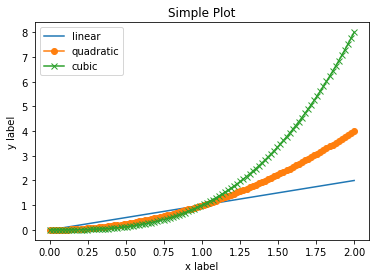

In [49]:
import matplotlib.pyplot as plt
import numpy as np # for these examples, import also the library for numerical computation


# plot some functions: linear, quadratic, cubic
x = np.linspace(0, 2, 100) # creates an array of 100 numbers between 0 and 2, evenly separated. 

# plotting multiple lines
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic', marker = 'o') # note the marker, matplotlib provides many styles (helps readability, 
                                                   # e.g against color blindness)
plt.plot(x, x**3, label='cubic', marker = 'x')

# adding axis labels
plt.xlabel('x label')
plt.ylabel('y label')

# figure title
plt.title("Simple Plot")

# adding the legend
plt.legend()

plt.show()

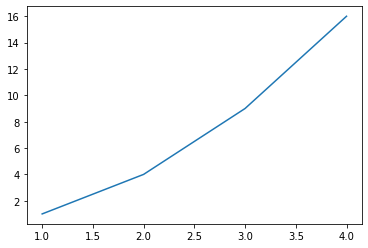

In [53]:
# line plot of custom data
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x,y)

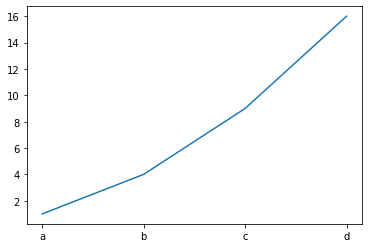

In [52]:
# customising the x-axis in a plt figure
xlabels = ['a','b','c','d']
plt.plot(xlabels, [1, 4, 9, 16])

## How to Change the Figure Size in MatPlotLib
You can use the plt.figure function to change the size of the figure.

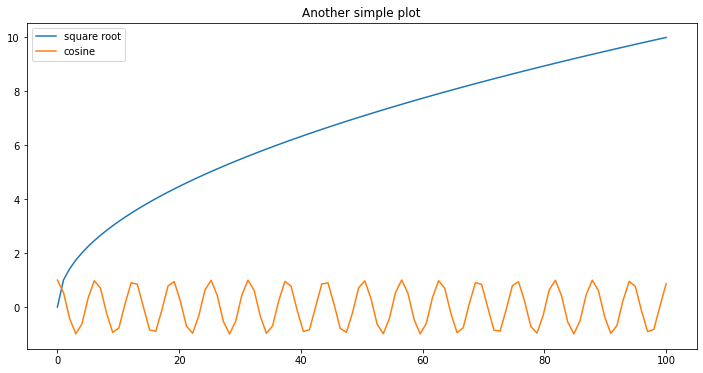

In [59]:
plt.figure(figsize=(12,6))

x = np.linspace(0, 100, 100)

plt.plot(x,np.sqrt(x), label='square root')
plt.plot(x,np.cos(x), label='cosine')

plt.title("Another simple plot")

plt.legend()

plt.show()

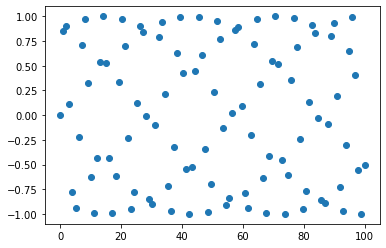

In [60]:
# scatter plot:

plt.scatter(x,np.sin(x))

# Plotting with categorical variables and saving figures

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

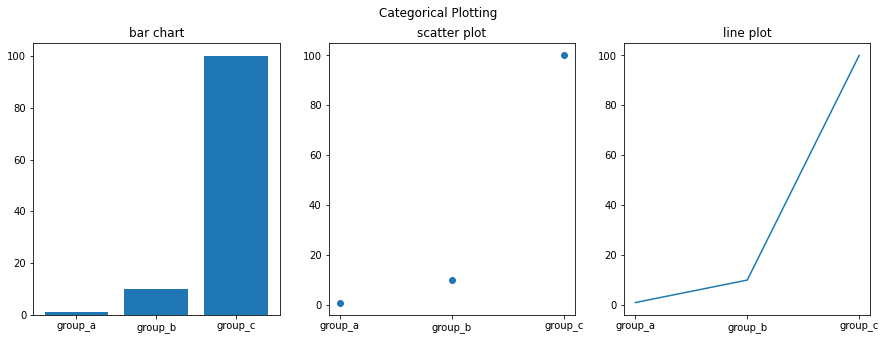

In [72]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(15, 5))

plt.subplot(131) #the figure has 1 row, 2 columns, and this plot is in the first column.
plt.bar(names, values)
plt.title("bar chart")
plt.subplot(132) #the figure has 1 row, 2 columns, and this plot is the second column.
plt.scatter(names, values)
plt.title("scatter plot")
plt.subplot(133)
plt.plot(names, values)
plt.title("line plot")
plt.suptitle('Categorical Plotting')

# optional, saving a figure to png, or pdf file
plt.savefig('plot.pdf')
plt.show()

A bar chart is a good choice when you want to show how some quantity varies among
some discrete set of items. For instance, the following plot shows how many Academy Awards
were won by each of a variety of movies:

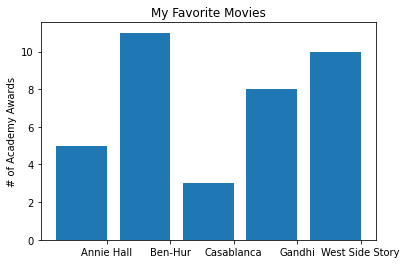

In [73]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

## Pie charts
The following is a demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

* slice labels
* auto-labeling the percentage
* offsetting a slice with "explode"
vdrop-shadow
* custom start angle

Note about the custom start angle:

The default startangle is 0, which would start the "Frogs" slice on the positive x-axis. This example sets startangle = 90 such that everything is rotated counter-clockwise by 90 degrees, and the frog slice starts on the positive y-axis.

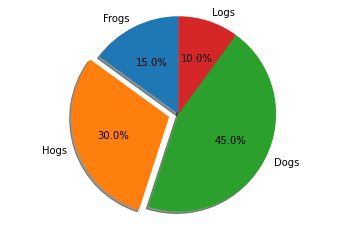

In [74]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Many plot types can be combined in one figure to create powerful and flexible representations of data.

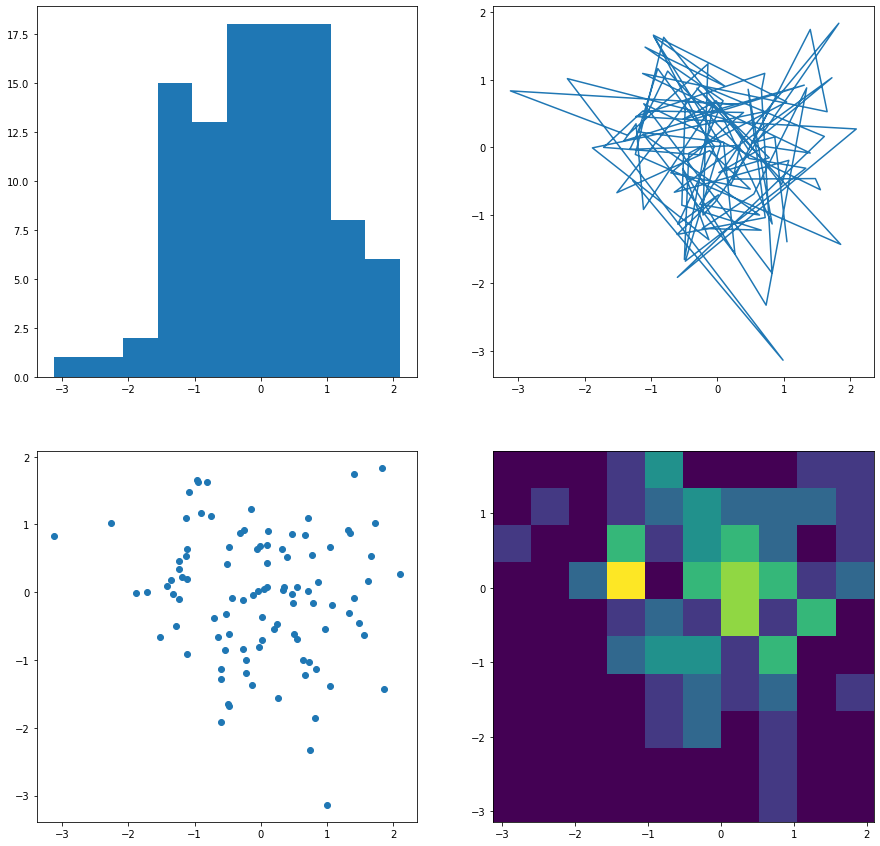

In [75]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

Write a Python program to create a stacked bar plot with error bars. 

Note: Use bottom to stack the women's bars on top of the men's bars.

Sample Data:

* Means (men) = (22, 30, 35, 35, 26)
* Means (women) = (25, 32, 30, 35, 29)
* Men Standard deviation = (4, 3, 4, 1, 5)
* Women Standard deviation = (3, 5, 2, 3, 3)

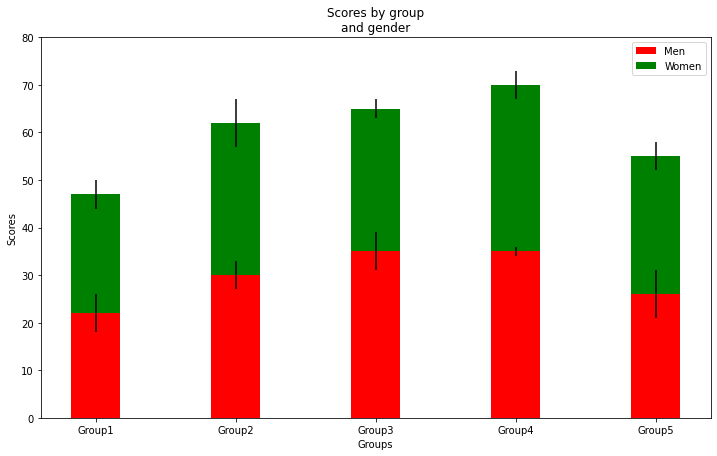

In [79]:
N = 5
menMeans = (22, 30, 35, 35, 26)
womenMeans = (25, 32, 30, 35, 29)
menStd = (4, 3, 4, 1, 5)
womenStd = (3, 5, 2, 3, 3)
# the x locations for the groups
ind = np.arange(N)    
# the width of the bars
width = 0.35      

plt.figure(figsize=(12,7))
p1 = plt.bar(ind, menMeans, width, yerr=menStd, color='red')
p2 = plt.bar(ind, womenMeans, width,
bottom=menMeans, yerr=womenStd, color='green')

plt.ylabel('Scores')
plt.xlabel('Groups')
plt.title('Scores by group\n' + 'and gender')
plt.xticks(ind, ('Group1', 'Group2', 'Group3', 'Group4', 'Group5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

Write a Python program to draw a scatter plot using random distributions to generate balls of different sizes anc colors.

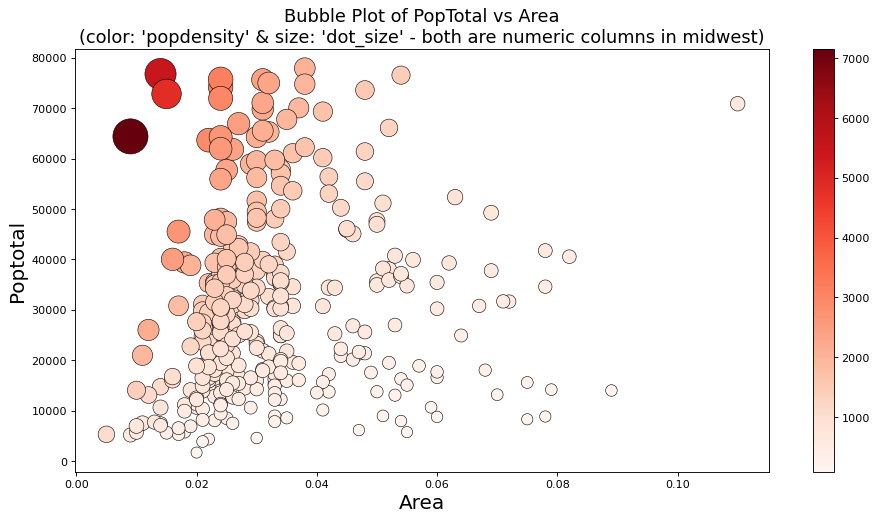

In [82]:
import csv
import matplotlib.pyplot as plt  

def get_data():

    res = {}    
    labels_list = []

    with open('Data/midwest_filter.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        cnt = 0
        for data in csv_reader:        
            if cnt==0:
                for i in range(len(data)):
                    res[data[i]] = []
                    labels_list.append(data[i])
            else:
                for i in range(len(data)):
                    tmp_list = res[labels_list[i]]
                    try:
                        tmp_list.append(float(data[i]))
                    except:
                        tmp_list.append(data[i])
                    res[labels_list[i]] = tmp_list
            cnt+=1
                                    
    return res


midwest = get_data()

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show() 

Reproduce these commonly used plot types.

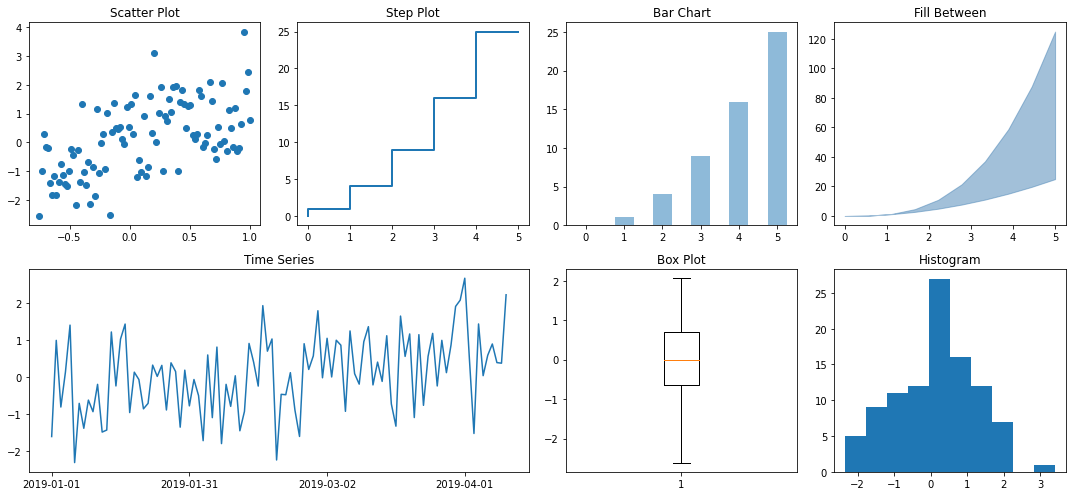

In [85]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series

from datetime import date, timedelta

dates = []

start_date = date(2019, 1, 1)
end_date = date(2019, 4, 10)
delta = timedelta(days=1)
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta

ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()